In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd

In [2]:
#data visulaization
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


#sklearn accuracy libs
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Training.csv')

In [4]:
df.columns.values

array(['House ID', 'House Type', 'Address', 'Address (city)', 'sq ft',
       'rooms', 'Bathrooms', 'Bedrooms', 'Parking', 'Maintenance', 'Tax',
       'Cost', '$/sqft', 'Sold/Listed (s/l)', 'Building/Neighbourhood',
       'Date_listed'], dtype=object)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 16 columns):
House ID                  177 non-null int64
House Type                177 non-null object
Address                   177 non-null object
Address (city)            177 non-null object
sq ft                     177 non-null int64
rooms                     177 non-null int64
Bathrooms                 177 non-null int64
Bedrooms                  177 non-null int64
Parking                   177 non-null int64
Maintenance               177 non-null object
Tax                       177 non-null object
Cost                      177 non-null object
$/sqft                    177 non-null object
Sold/Listed (s/l)         177 non-null object
Building/Neighbourhood    177 non-null object
Date_listed               177 non-null object
dtypes: int64(6), object(10)
memory usage: 22.2+ KB


In [6]:
# changing this columns from categories to FLoats

df['Cost'] = df[df.columns[11:12]].replace('[\$,]', '', regex=True).astype(float)
df['$/sqft'] = df[df.columns[12:13]].replace('[\$,]', '', regex=True).astype(float)
df['Tax'] = df[df.columns[10:11]].replace('[\$,]', '', regex=True).astype(float)
df['Maintenance'] = df[df.columns[9:10]].replace('[\$,]', '', regex=True).astype(float)


In [7]:
df.describe()

,House ID,sq ft,rooms,Bathrooms,Bedrooms,Parking,Maintenance,Tax,Cost,$/sqft
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,90.175141,1165.841808,6.163842,1.943503,2.101695,2.028249,753.102147,2237.625198,456176.237288,395.432994
std,52.033620,150.679061,0.805692,0.496780,0.303104,0.418729,166.476912,448.524321,64988.864898,62.070731
min,1.000000,850.000000,5.000000,1.000000,2.000000,0.000000,133.000000,1477.710000,325000.000000,265.380000
25%,45.000000,1100.000000,6.000000,2.000000,2.000000,2.000000,658.050000,1897.330000,410000.000000,346.080000
50%,90.000000,1100.000000,6.000000,2.000000,2.000000,2.000000,790.100000,2148.910000,439900.000000,390.000000
75%,135.000000,1300.000000,6.000000,2.000000,2.000000,2.000000,843.570000,2378.230000,499000.000000,435.000000
max,179.000000,1650.000000,10.000000,4.000000,3.000000,3.000000,1244.590000,3873.000000,599999.000000,588.120000


In [8]:
df[['sq ft', 'Cost']].groupby(['sq ft'], as_index=False).mean().sort_values(by='Cost', ascending=False)

,sq ft,Cost
9,1342,585000.000000
12,1403,572000.000000
14,1600,569000.000000
15,1650,559000.000000
13,1500,523175.000000
6,1227,498800.000000
11,1400,480000.000000
8,1300,465705.269231
3,1100,451442.178571
4,1160,448000.000000


In [9]:
df[['rooms', 'Cost']].groupby(['rooms'], as_index=False).mean().sort_values(by='Cost', ascending=False)

,rooms,Cost
4,9,524900.000000
3,8,523169.800000
5,10,519950.000000
2,7,458227.777778
1,6,453059.968254
0,5,430652.000000


In [10]:
df[['Bathrooms', 'Cost']].groupby(['Bathrooms'], as_index=False).mean().sort_values(by='Cost', ascending=False)

,Bathrooms,Cost
3,4,565966.666667
2,3,560987.125000
1,2,455723.021127
0,1,410197.000000


In [11]:
df.head()

,House ID,House Type,Address,Address (city),sq ft,rooms,Bathrooms,Bedrooms,Parking,Maintenance,Tax,Cost,$/sqft,Sold/Listed (s/l),Building/Neighbourhood,Date_listed
0,1,Condo,3650 Kaneff Cres 1704\n Mississauga Ontario L5...,Mississauga,1300,6,2,2,1,807.55,2168.00,387000.0,297.69,s,3650 Kaneff Cres,1/31/2017
1,2,Condo,3650 Kaneff Cres 1704\n Mississauga Ontario L5...,Mississauga,1300,6,2,2,1,807.55,2163.77,406000.0,312.31,s,3650 Kaneff Cres,2/1/2017
2,3,Condo,3650 Kaneff Cres 1802\n Mississauga Ontario L5...,Mississauga,1300,6,2,2,2,798.00,2174.39,434500.0,334.23,s,3650 Kaneff Cres,2/2/2017
3,4,Condo,3650 Kaneff Cres 1802\n Mississauga Ontario L5...,Mississauga,1300,6,2,2,2,770.80,2168.03,385000.0,296.15,s,3650 Kaneff Cres,2/3/2017
4,5,Condo,3650 Kaneff Cres 1802\n Mississauga Ontario L5...,Mississauga,1300,7,2,2,2,795.87,2180.00,425000.0,326.92,s,3650 Kaneff Cres,2/4/2017


In [12]:
df = df.drop(['Address', 'Address (city)', 'Sold/Listed (s/l)','Date_listed','House ID'], axis=1)

In [13]:
df.describe()

,sq ft,rooms,Bathrooms,Bedrooms,Parking,Maintenance,Tax,Cost,$/sqft
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1165.841808,6.163842,1.943503,2.101695,2.028249,753.102147,2237.625198,456176.237288,395.432994
std,150.679061,0.805692,0.496780,0.303104,0.418729,166.476912,448.524321,64988.864898,62.070731
min,850.000000,5.000000,1.000000,2.000000,0.000000,133.000000,1477.710000,325000.000000,265.380000
25%,1100.000000,6.000000,2.000000,2.000000,2.000000,658.050000,1897.330000,410000.000000,346.080000
50%,1100.000000,6.000000,2.000000,2.000000,2.000000,790.100000,2148.910000,439900.000000,390.000000
75%,1300.000000,6.000000,2.000000,2.000000,2.000000,843.570000,2378.230000,499000.000000,435.000000
max,1650.000000,10.000000,4.000000,3.000000,3.000000,1244.590000,3873.000000,599999.000000,588.120000


In [14]:
df.describe(include=['O'])

,House Type,Building/Neighbourhood
count,177,177
unique,2,45
top,Condo,250 Webb Dr
freq,168,18


In [15]:
all_null_rows = df[df['Tax'].isnull()]
all_null_rows

,House Type,sq ft,rooms,Bathrooms,Bedrooms,Parking,Maintenance,Tax,Cost,$/sqft,Building/Neighbourhood


In [16]:
#tax_guess = df[(df['$/sqft'] >= 340.00) & (df['$/sqft'] < 345.00)]['Tax'].dropna()

In [17]:
#df['Tax'][12] = tax_guess.mean()

In [18]:
#df['House Type'].drop_duplicates()
#can name this and map it to a number however will use an inbuild scikit learn one hot encoder method
#df['House Type'] = df['House Type'].map({'Apartment': 0, 'Condo/Town': 1, 'Condo': 2}).astype(int)

## Some visualization to help build some intuition into how to apply machine learning

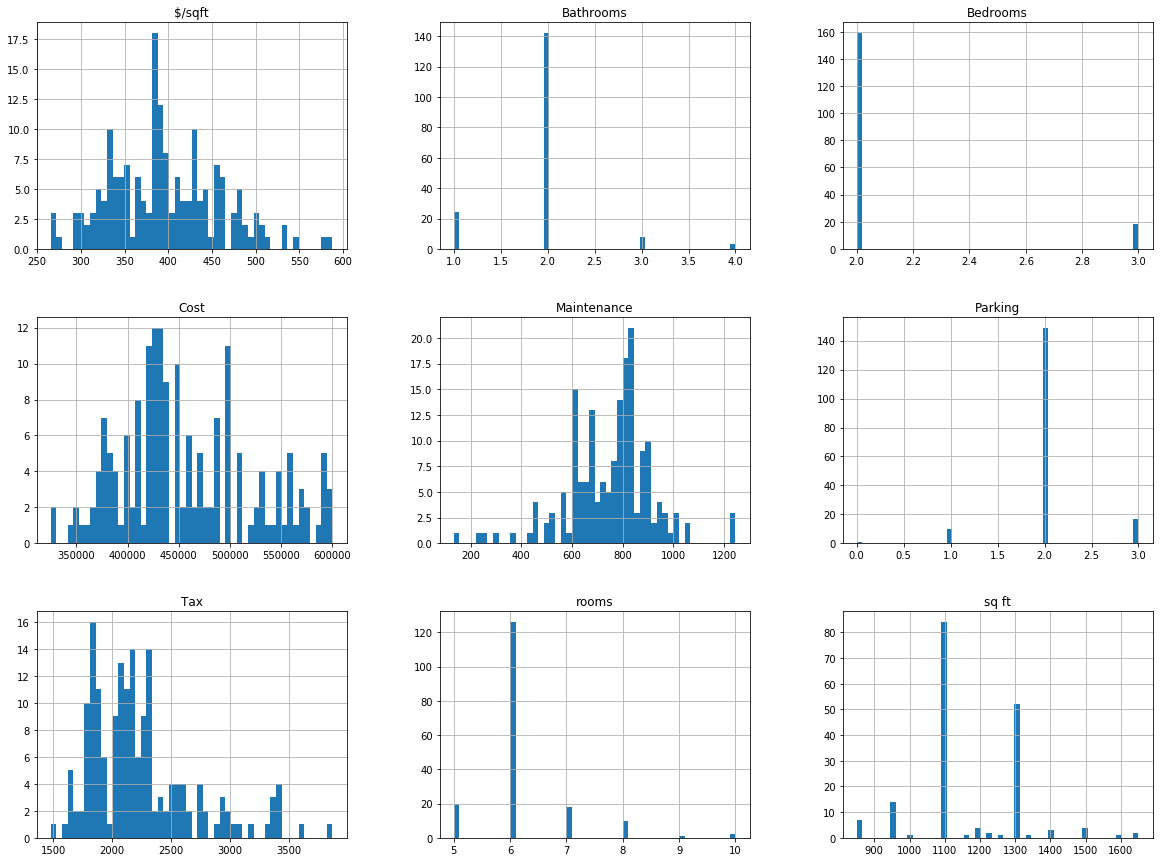

In [19]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
df["Cost_cat"] = np.ceil(df["Cost"]/100000)
df["Cost_cat"].head()

0    4.0
1    5.0
2    5.0
3    4.0
4    5.0
Name: Cost_cat, dtype: float64

In [21]:
# let's check the correlation of the various attributes to the cost of house
corr_matrix = df.corr()
corr_matrix["Cost"].sort_values(ascending=False)

Cost           1.000000
Cost_cat       0.900518
Tax            0.730197
$/sqft         0.612341
Bathrooms      0.457699
sq ft          0.344471
rooms          0.282528
Bedrooms       0.281382
Parking        0.181444
Maintenance   -0.016478
Name: Cost, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A50C9F9D68>,
      dtype=object)

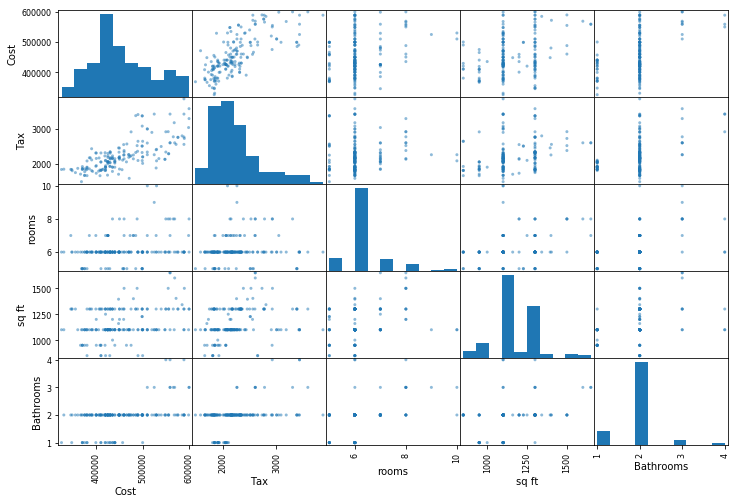

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["Cost", "Tax", "rooms", "sq ft", "Bathrooms"]
scatter_matrix(df[attributes], figsize=(12,8))

In [23]:
#Some feature engineering could help create some more features that could contribute to the cost with a higher correlation

df["avg_room_size"] = df["sq ft"]/df["rooms"]
df["maintenance_per_sqft"] = df["Maintenance"]/df["sq ft"]
df["bedroom_to_totalRoom_ratio"] = df["Bedrooms"]/df["rooms"]
df["bathroom_to_totalRoom_ratio"] = df["Bathrooms"]/df["rooms"]

In [24]:
# let's check the correlation of the newly created attributes
corr_matrix = df.corr()
corr_matrix["Cost"].sort_values(ascending=False)

Cost                           1.000000
Cost_cat                       0.900518
Tax                            0.730197
$/sqft                         0.612341
Bathrooms                      0.457699
sq ft                          0.344471
bathroom_to_totalRoom_ratio    0.343979
rooms                          0.282528
Bedrooms                       0.281382
Parking                        0.181444
avg_room_size                  0.089524
bedroom_to_totalRoom_ratio    -0.001786
Maintenance                   -0.016478
maintenance_per_sqft          -0.263078
Name: Cost, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A50C69A438>,
      dtype=object)

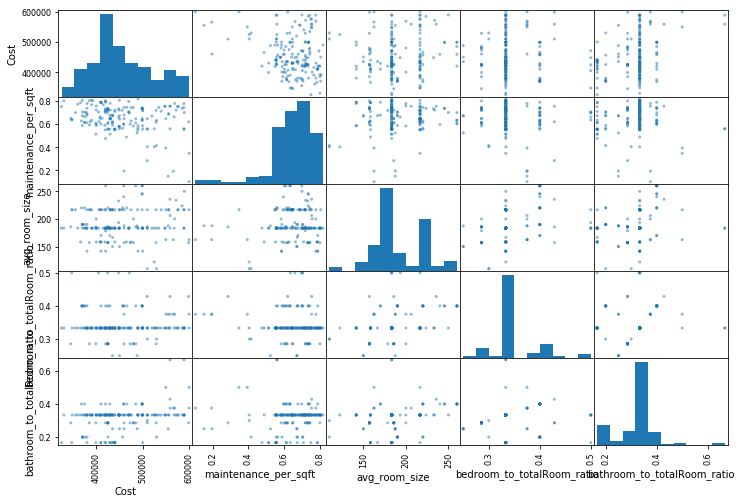

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["Cost", "House Type", "maintenance_per_sqft", "avg_room_size", "bedroom_to_totalRoom_ratio", "bathroom_to_totalRoom_ratio"]
scatter_matrix(df[attributes], figsize=(12,8))

#### BUILD PREPARATION STEPS THE DATA

In [26]:
#We can create custom Transformers using scikit learn, all you need to do is import BaseEstimator, and TransformerMixin
#from sklearn.base:

from sklearn.base import BaseEstimator, TransformerMixin
from future_encoders import OneHotEncoder
from scipy.sparse import hstack

#Below class selects the Dataframe column attributes, will be used to select the numerical and categorical columns
#So that they can be isolated and prepared seperately as they have different preperation steps

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.DataFrame(X[self.attribute_names].values, columns=self.attribute_names)

#Below class creates encoded category features in a pandas dataframe

class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, is_series = False):
        self.is_series = is_series
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder(sparse=False)
        first_iter = True
        if self.is_series == False:
            for i in X.columns:
                if first_iter == True:
                    X_i_encoded, X_i_categories = X[i].factorize()
                    X_i_1hot = encoder.fit_transform(X_i_encoded.reshape(-1,1))
                else:
                    X_i_encoded, X_i_categories = X[i].factorize()
                    X_i_1hot = hstack([X_i_1hot, encoder.fit_transform(X_i_encoded.reshape(-1,1))]).toarray()                                      
            return X_i_1hot
        else:
            return encoder.fit_transform(X.reshape(-1,1))

        


#### Create a pipeline for the preperation steps so that we can automate the multiple steps

In [27]:
#because the numerical and categorical columns need to be processed differently we split them
#numerical gets processed using standard scaler, categorical gets processed using one hot encoder

num_attribs = ['sq ft',
 'rooms',
 'Bathrooms',
 'Bedrooms',
 'Parking',
 'Maintenance',
 'Tax',
 '$/sqft',
 'avg_room_size',
 'maintenance_per_sqft',
 'bedroom_to_totalRoom_ratio',
 'bathroom_to_totalRoom_ratio']

cat_attribs = ['House Type',
 'Building/Neighbourhood']

In [28]:
#let's put it all together by running the data preperation pipelines we built
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoryEncoder()),
])


full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

#### Create x and y matrices for train set and test set

In [29]:
X = df.drop("Cost", axis=1)
y = df["Cost"].copy()

In [30]:
#new way is to use a class from scikit learn called stratifiedsplit which will split while keeping distribution between the train
#and test set the same accross a certain feature...in this case the Cost category of the house which is in 50K intervals

X_prepared = full_pipeline.fit_transform(X)

df["Cost_cat"] = np.ceil(df['Cost']/50000)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Cost_cat"]):
    X_train, X_test = X_prepared[train_index], X_prepared[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    

In [31]:
#only needed Cost_cat column for StratifiedShuffleSplit, can remove now
df.drop("Cost_cat", axis=1, inplace=True)

#### Train a linear regression model

In [32]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Predict using test data to guage accuracy of model

In [33]:
housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.891665607264243e+16

#### The lin regressions seems way too off...there might be some features in here making it go off the charts. Let's look at some examples predicted vs the test set

In [50]:
mapped = zip (housing_predictions, y_test)
mapped = set(mapped)
print ("The zipped result is : ",end="")
print (mapped)

The zipped result is : {(587408.0, 589800.0), (420816.0, 425000.0), (-1.2033697579866758e+17, 549900.0), (371376.0, 379900.0), (501552.0, 475000.0), (450144.0, 449000.0), (-1.167824084143542e+17, 524900.0), (416480.0, 419900.0), (444912.0, 449990.0), (542400.0, 556000.0), (469184.0, 471000.0), (427872.0, 435000.0), (378320.0, 379990.0), (377696.0, 370000.0), (571760.0, 576000.0), (448576.0, 449000.0), (404000.0, 399900.0), (480928.0, 479900.0), (-1.0566737375674509e+17, 459900.0), (568736.0, 572000.0), (409024.0, 408000.0), (424528.0, 424900.0), (347136.0, 347000.0), (538368.0, 549900.0), (449952.0, 449900.0), (502576.0, 499900.0), (364864.0, 374800.0), (505968.0, 500000.0), (401408.0, 405000.0), (-4.721891267058172e+16, 472900.0), (438400.0, 439900.0), (410944.0, 409900.0), (440496.0, 439900.0), (-9.118381271328755e+16, 465900.0), (401584.0, 400000.0), (-6.850835251409889e+16, 529900.0)}


#### As you can see above some of the predictions are way off, while some being very close, let's try using a different regressor with decision trees

In [51]:
housing_predictions_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

26342.828986272525

#### seems much better, maybe we can use a hybrid of the above and below to predict the house prices, let's see how the predictions stack against the real data

In [52]:
mapped_tree = zip (housing_predictions_tree, y_test)
mapped_tree = set(mapped_tree)
print ("The zipped result is : ",end="")
print (mapped_tree)

The zipped result is : {(374800.0, 374800.0), (500000.0, 500000.0), (409900.0, 409900.0), (435000.0, 435000.0), (498800.0, 465900.0), (424202.0, 405000.0), (424900.0, 425000.0), (424900.0, 424900.0), (412500.0, 408000.0), (448000.0, 449990.0), (370000.0, 379990.0), (539900.0, 572000.0), (389900.0, 399900.0), (429000.0, 370000.0), (489900.0, 499900.0), (435000.0, 400000.0), (566000.0, 549900.0), (548000.0, 556000.0), (576000.0, 576000.0), (529000.0, 549900.0), (510000.0, 524900.0), (539900.0, 589800.0), (534900.0, 479900.0), (489900.0, 472900.0), (410000.0, 471000.0), (510000.0, 529900.0), (418500.0, 419900.0), (399000.0, 379900.0), (449000.0, 449900.0), (399000.0, 459900.0), (439900.0, 439900.0), (348000.0, 347000.0), (449000.0, 449000.0), (524900.0, 475000.0)}
